Deaths  has  263862  entries
Demographics  has  643  entries
Age  has  617  entries
Hospitals  has  552  entries
The keys of the dataframes are: 

Deaths :
length:  263862
Index(['pc11_state_id', 'pc11_district_id', 'date', 'total_cases',
       'total_deaths'],
      dtype='object')
Demographics :
length:  643
Index(['pc11_state_id', 'pc11_district_id', 'pc11_urb_share', 'pc11_slum_pop',
       'pc11_vd_area', 'pc11_td_area', 'pc11_tot_area', 'pc11_pop_dens',
       'pc11r_pca_tot_p', 'pc11u_pca_tot_p', 'pc11_pca_tot_p',
       'pc11r_pca_tot_m', 'pc11u_pca_tot_m', 'pc11_pca_tot_m',
       'pc11r_pca_tot_f', 'pc11u_pca_tot_f', 'pc11_pca_tot_f',
       'pc11r_pca_p_lit', 'pc11u_pca_p_lit', 'pc11_pca_p_lit',
       'pc11r_pca_m_lit', 'pc11u_pca_m_lit', 'pc11_pca_m_lit',
       'pc11r_pca_f_lit', 'pc11u_pca_f_lit', 'pc11_pca_f_lit',
       'pc11r_pca_p_sc', 'pc11u_pca_p_sc', 'pc11_pca_p_sc', 'pc11r_pca_m_sc',
       'pc11u_pca_m_sc', 'pc11_pca_m_sc', 'pc11r_pca_f_sc', 'pc11u_pca_f_sc',
 

C:\Users\danie\AppData\Local\Temp/ipykernel_20992/2328574513.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champion.iloc[89:98]['total_cases'] = total_cases_nd/len(ourrange)
C:\Users\danie\AppData\Local\Temp/ipykernel_20992/2328574513.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champion.iloc[89:98]['total_deaths'] = total_deaths_nd/len(ourrange)
C:\Users\danie\AppData\Local\Temp/ipykernel_20992/2328574513.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DISTRICT    641 non-null    object  
 1   ST_NM       641 non-null    object  
 2   ST_CEN_CD   641 non-null    int64   
 3   DT_CEN_CD   641 non-null    int64   
 4   censuscode  641 non-null    int64   
 5   geometry    641 non-null    geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 30.2+ KB
0 values are missing.


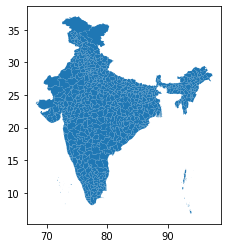

0 censuscode
1 Districtname
2 pc11_state_name
3 State id
4 Literacy
5 population density
6 slum population
7 Urban population share
8 population
9 pc11_tot_area
10 Beds (IC)
11 Beds (total)
12 Care facilities (hospitals/clinics)
13 average_age
14 total_cases
15 total_deaths
16 deaths per 100.000
17 cases per 100.000
18 population density2
19 slum share
20 6mil
0 Literacy
1 population density
2 slum population
3 Urban population share
4 population
5 pc11_tot_area
6 Beds (IC)
7 Beds (total)
8 Care facilities (hospitals/clinics)
9 average_age
10 total_cases
11 total_deaths
12 deaths per 100.000
13 cases per 100.000
14 population density2
15 slum share


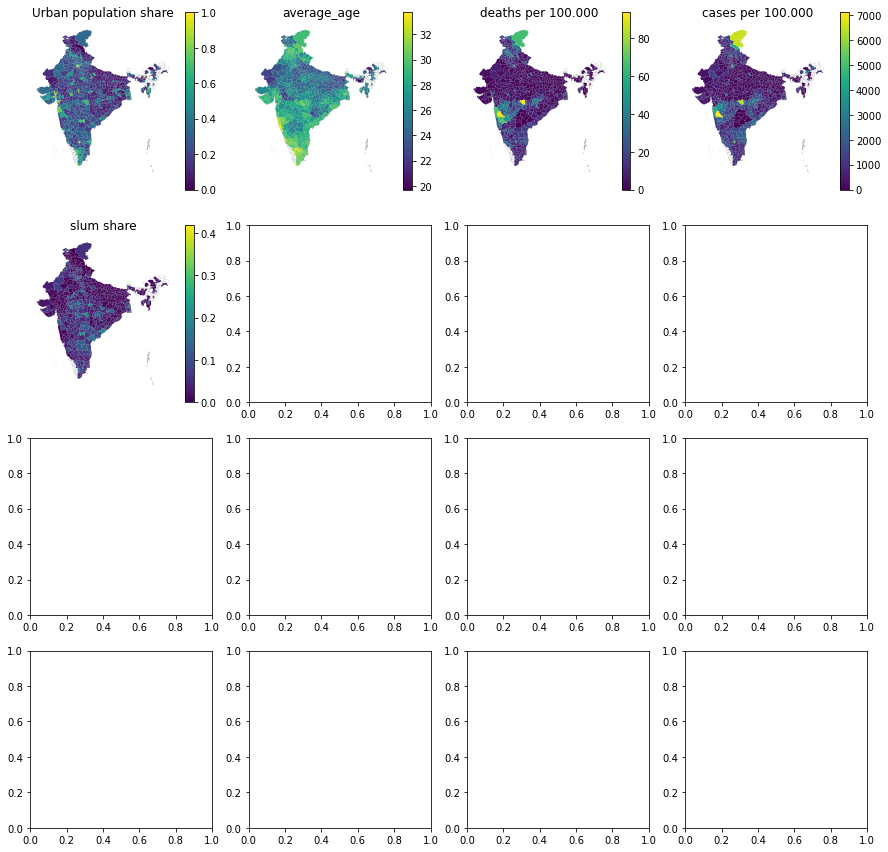

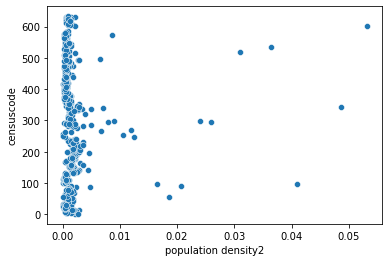

C:\Users\danie\AppData\Local\Temp/ipykernel_20992/2723395961.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection['perc cases'] = pd.qcut(selection['cases per 100.000'], k, labels = klist)
C:\Users\danie\AppData\Local\Temp/ipykernel_20992/2723395961.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection['perc deaths'] = pd.qcut(selection['deaths per 100.000'], k, labels = klist)


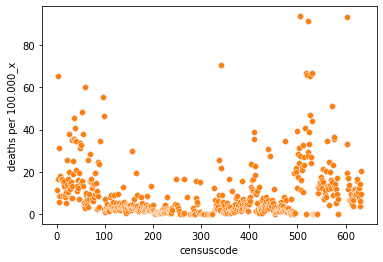

464    7120.553061
2      6521.234277
449    6386.451692
530    5802.228319
515    5132.945821
          ...     
481       0.000000
482       0.000000
483       0.000000
484       0.000000
265       0.000000
Name: cases per 100.000_x, Length: 561, dtype: float64


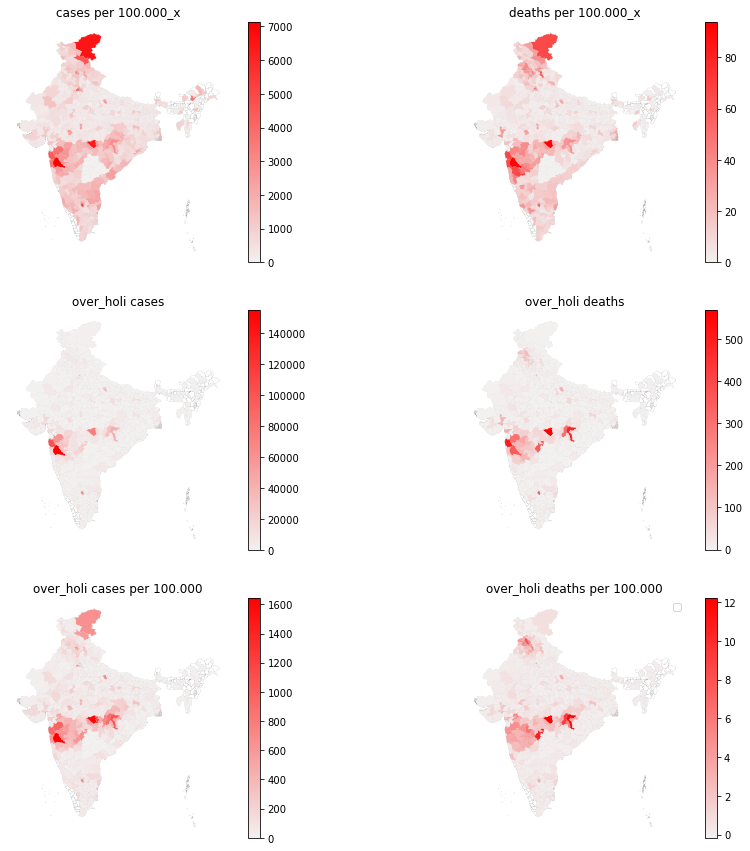

MinMaxScaler()


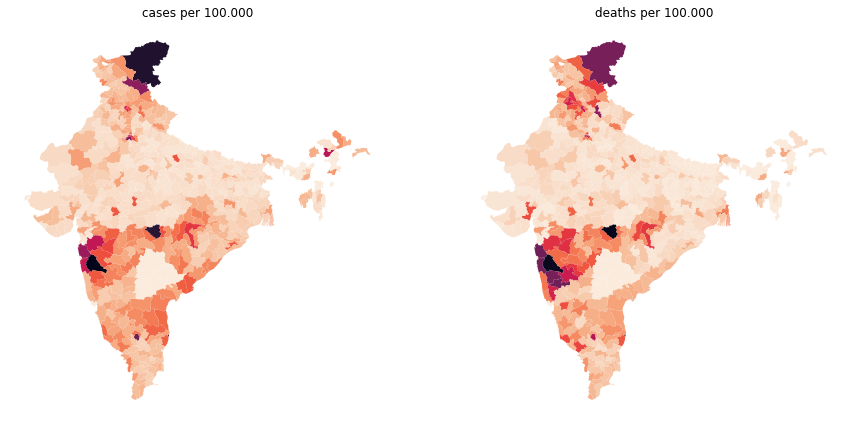

KeyError: "['Literacy %'] not in index"

KeyError: "['Literacy %'] not in index"

In [17]:
%run "Dataframes.ipynb"
%run "Map_india.ipynb"

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from functools import reduce
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [ ]:
#drops the date and state id columns
ddrop = deaths_frame.drop(['date','pc11_state_id'],axis=1)

#groups by district and sums deaths and cases over the entire period
deaths_total = ddrop.groupby(['censuscode']).sum()

deaths_total.reset_index(inplace = True)

deaths_total.head()

In [ ]:
keys_frame = names_frame

In [ ]:
ddrop_keys = keys_frame.drop(['pc11_state_id','pc11_state_name'],axis=1)

#drops duplicates
dkeys = ddrop_keys.drop_duplicates(subset=['pc11_district_name']).rename({'pc11_district_id': 'censuscode', 'pc11_district_name': 'district'}, axis=1)

#converts censuscode float to int
dkeys = dkeys.fillna(0).astype({'censuscode': 'int64'})

#sets censuscode as index
#dkeys = dkeys.set_index('censuscode')

dkeys_dict = dkeys.to_dict()

In [ ]:
dkeys

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.kdeplot(deaths_total['total_deaths'], ax=axs[0])
sns.kdeplot(deaths_total['total_cases'], ax=axs[1])
f.tight_layout()



#ax = sns.joinplot(x="censuscode", y="total_cases", data=dtot,)

In [ ]:
dkeys_dict[94]  = 'delhi'
dkeys_dict[519] = 'mumbai'

In [ ]:
#sorts by 10 most affected districts
dh_cases = deaths_total.sort_values(by=['total_cases'],ascending = False).head(10)
dh_deaths = deaths_total.sort_values(by=['total_deaths'],ascending = False).head(10)

#merges databases
df_merge = pd.merge(dh_deaths, dh_cases, how='outer').set_index('censuscode')

df_dc = df_merge.join(dkeys)

df_dc


In [ ]:
deaths_total = deaths_total.merge(demog_frame[['censuscode','pc11_pca_tot_p']])
deaths_total = deaths_total.rename({'pc11_pca_tot_p':'population'}, axis=1)
deaths_total

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from functools import reduce
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [ ]:
champion

In [ ]:
f, axs = plt.subplots(4, 3, figsize=(15, 15), gridspec_kw=dict(width_ratios=[4, 4, 4]))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    plot = sns.scatterplot(data = champion, y = 'censuscode', x = col, ax=axs[i])
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
f.tight_layout()

In [ ]:
f, axs = plt.subplots(4, 3, figsize=(15, 10), gridspec_kw=dict(width_ratios=[4, 4, 4]))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    plot = sns.kdeplot(champion[col], ax=axs[i])
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
f.tight_layout()

In [ ]:
f, axs = plt.subplots(4, 3, figsize=(15, 5), gridspec_kw=dict(width_ratios=[4, 4, 4]))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    plot = sns.boxplot(data = champion, x = col, ax=axs[i],fliersize=1.5, linewidth = 0.8)
f.tight_layout()